# Creating model for sentiment classification with Keras(EN)

## 1. Data retrieval

For this model, movie revies dataset will be used

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [5]:
import nltk
from pathlib import Path
nltk.data.path.append(f"{str(Path.home())}/datasets")
import numpy as np
import pandas as pd
from nltk.corpus import movie_reviews

In [6]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
negfeats = [movie_reviews.words(fileids=[f]) for f in negids]
posfeats = [movie_reviews.words(fileids=[f]) for f in posids]
X = [*negfeats, *posfeats] # note that our classes are not shuffled
X = [" ".join(list(x)) for x in X]
y = [0]*len(negfeats)+[1]*len(posfeats)

In [5]:
sum(y)/len(y) # classes are balanced

0.5

## 2. Tokenization
Here we wil configure tokenizer. First of all we shall estimate the size of dictionary.


In [7]:
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
all_counts = FreqDist((word for x in X for word in word_tokenize(x) if word not in stop_words))

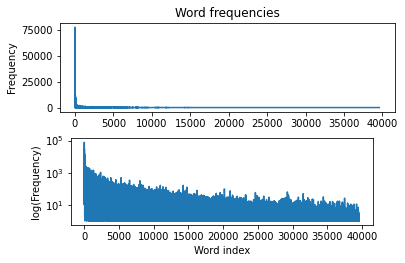

In [8]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Frequency')
ax1.set_title('Word frequencies')
ax1.plot(all_counts.values())
ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
ax2.plot(all_counts.values())
ax2.semilogy()
ax2.set_ylabel('log(Frequency)')
ax2.set_xlabel('Word index')

plt.show()

In [9]:
all_counts.most_common(15)

[(',', 77717),
 ('.', 65876),
 ("'", 30591),
 ('``', 17632),
 ('-', 15626),
 (')', 11781),
 ('(', 11664),
 ('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('?', 3771),
 ('like', 3690),
 (':', 3042),
 ('even', 2565),
 ('good', 2411)]

In [10]:
num_words = 5000

In [11]:
tokenizer = Tokenizer(
    num_words=num_words, 
    lower=True,
    split=' ', 
    char_level=False, 
    oov_token="<OOV>",
)

In [12]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


LearningRateSchedulerCb = LearningRateScheduler(
    scheduler, 
    verbose=0
)


In [13]:
tokenizer.fit_on_texts(X)

In [14]:
sequences = tokenizer.texts_to_sequences(X)

In [15]:
sequences = pad_sequences(sequences, padding="post", maxlen=1000)

In [16]:
sequences.shape

(2000, 1000)

In [17]:
tf.__version__

'2.4.1'

In [18]:
num_words

5000

In [19]:
tfmodel = Sequential([
    Embedding(num_words, 12),
    Dropout(0.3),
    Bidirectional(LSTM(12)),
    Bidirectional(LSTM(12, dropout=0.2)),
    Dense(17, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

NameError: name 'Dropout' is not defined

In [120]:
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [121]:
tfmodel.compile(
    loss="binary_crossentropy", 
    optimizer=adam, 
    metrics=["accuracy"])
tfmodel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 12)          60000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 24)          2400      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 24)                3552      
_________________________________________________________________
dense_19 (Dense)             (None, 17)                425       
_________________________________________________________________
dropout_3 (Dropout)          (None, 17)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 18        
Total params: 66,395
Trainable params: 66,395
Non-trainable params: 0
__________________________________________________

In [123]:
history = tfmodel.fit(sequences, np.array(y),
    epochs=40, 
    verbose=1,
#     callbacks=[LearningRateSchedulerCb],
    batch_size=1, 
    validation_split=0.2, 
#     validation_data=(X_test, y_test), 
    shuffle=True, 
#     class_weight=None,
#     sample_weight=None, 
#     initial_epoch=0, 
#     steps_per_epoch=None,
#     validation_steps=None, 
#     validation_batch_size=None, 
#     validation_freq=1,
#     max_queue_size=10, 
#     workers=1, 
#     use_multiprocessing=False
           )

Epoch 1/40
  51/1600 [..............................] - ETA: 11:01 - loss: 0.0022 - accuracy: 1.0000

KeyboardInterrupt: 

Populating the interactive namespace from numpy and matplotlib


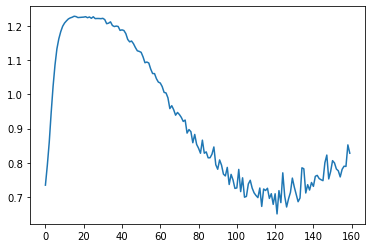

In [108]:
%pylab inline
plot(history.history["val_loss"])

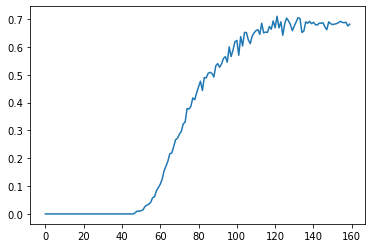

In [109]:
plot(history.history["val_accuracy"])

## 4. Saving model

In [ ]:
classifier_path = "./Classifier.pkl"
vectorizer_path = "./Vectorizer.pkl"

For TensorFlow based model I'd better use native TF API

In [110]:
tfmodel.save("TFModel")

INFO:tensorflow:Assets written to: TFModel/assets


In [ ]:
tok